## <div style="text-align: center; color: green;">Project Title: Email Spam Detection</div>

### <div style="color: gray;">Step 1: Dataset Overview-</div>

#### Import necessary libraries:

In [1]:
# Import the numerical algebra libs
import pandas as pd
import numpy as np
import seaborn as sns

# Import visualization libs
import matplotlib.pyplot as plt
import plotly.express as px
import string 

#Import warnings libs
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset:

In [2]:
data = pd.read_csv('spam_data.csv', encoding='latin1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#### Dataset Description:

##### Overview of Amazon dataset

The dataset contains 5 columns-

- **v1:** Appears to be a label, with two unique values: "ham" and "spam".
- **v2:** Contains the actual message or text data.
- **Unnamed: 2, Unnamed: 3, Unnamed: 4:** These columns have very few non-null values, suggesting they might not be relevant or may require further investigation.

##### Describe the columns v1 & v2

1. **v1 (Label):**
This column contains the classification label for the message.
- `Values:`
   - "ham": Indicates that the message is not spam (legitimate).
   - "spam": Indicates that the message is spam (unsolicited or unwanted).
- `Purpose:` Used as the target variable for spam detection, where the goal is to predict whether a message is "ham" or "spam" based on its content.

2. **v2 (Message Text):**
This column contains the text of the messages.
- `Values:` Each entry is a string of varying length, representing a message or communication.
- `Purpose:` These are the input features used for analysis. The text will be processed (tokenized, vectorized) to extract meaningful patterns to predict the labels in v1.

Essentially, v1 provides the ground truth for classification, and v2 is the data being classified.

### <div style="color: gray;">Step 2: Data Preprocessing-</div>

#### Handle Missing Values & Useless Columns:

In [3]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [4]:
data.shape

(5572, 5)

In [5]:
data.describe().transpose()

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,"MK17 92H. 450Ppw 16""",2
Unnamed: 4,6,5,"GNT:-)""",2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [9]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
data.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Encode target variable:

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [12]:
data['target'] = encoder.fit_transform(data['target'])

In [13]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
data.isnull().sum()

target    0
text      0
dtype: int64

#### Handle Duplicate Values:

In [15]:
data.duplicated().sum()

403

In [16]:
data = data.drop_duplicates(keep='first')

In [17]:
data.duplicated().sum()

0

In [18]:
data.shape

(5169, 2)

#### Data Distribution of Target Column:

In [19]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

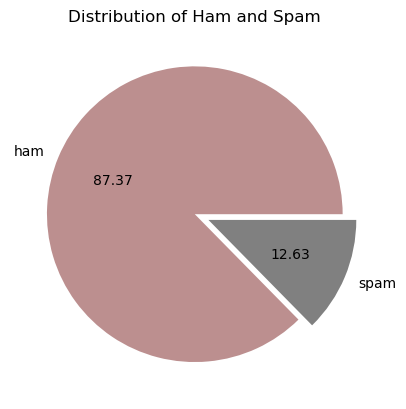

In [21]:
#Target Variable Distribution of Ham and Spam using pyplot

import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(), labels=['ham', 'spam'],autopct='%0.2f', explode=(0, 0.1), colors=['rosybrown', 'gray'])
plt.title('Distribution of Ham and Spam')
plt.show()

#### Descriptive Statistics of Text Column:

In [22]:
import nltk

In [23]:
#To see number of character in text column
data['num_char'] = data['text'].apply(len)

In [24]:
data.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
#To see number of word in text column
data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
data.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
#To see number of sentence in text column
data['num_sentences'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [28]:
data.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


#### Describle new Column:

In [29]:
data[['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
data[data['target'] == 0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
data[data['target']==1][['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


#### Histplot Analysis:

In [32]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

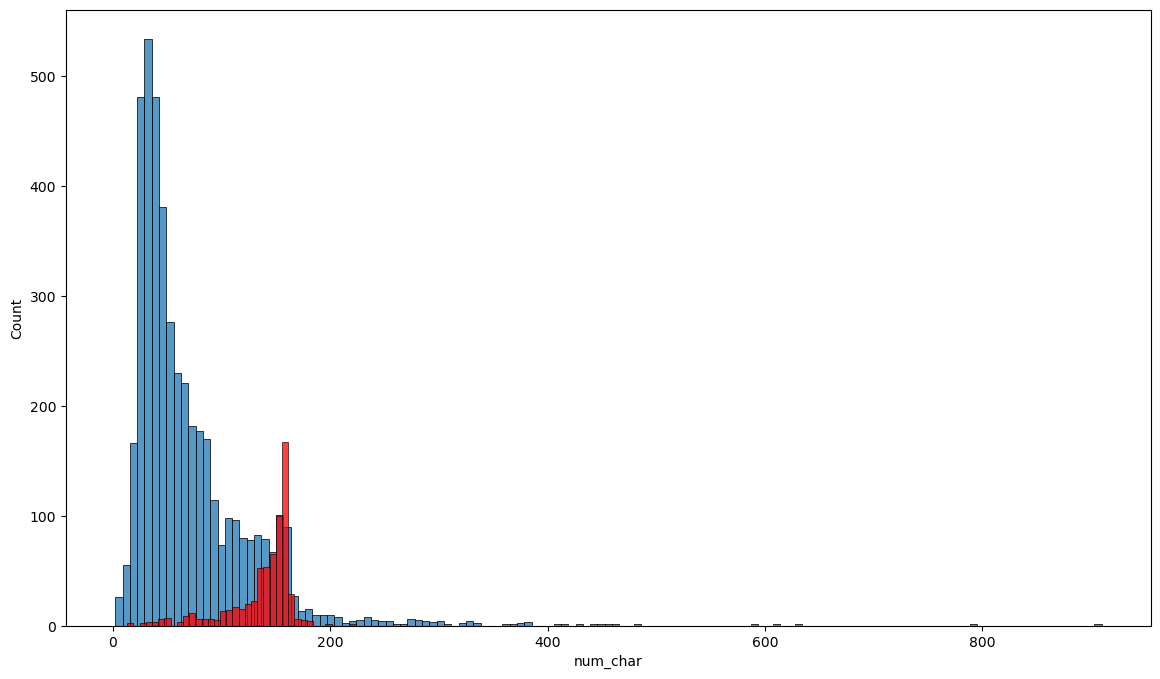

In [33]:
plt.figure(figsize=(14, 8))
sns.histplot(data[data['target']==0]['num_char'])
sns.histplot(data[data['target']==1]['num_char'], color='red')

#### Pair Plot Analysis:

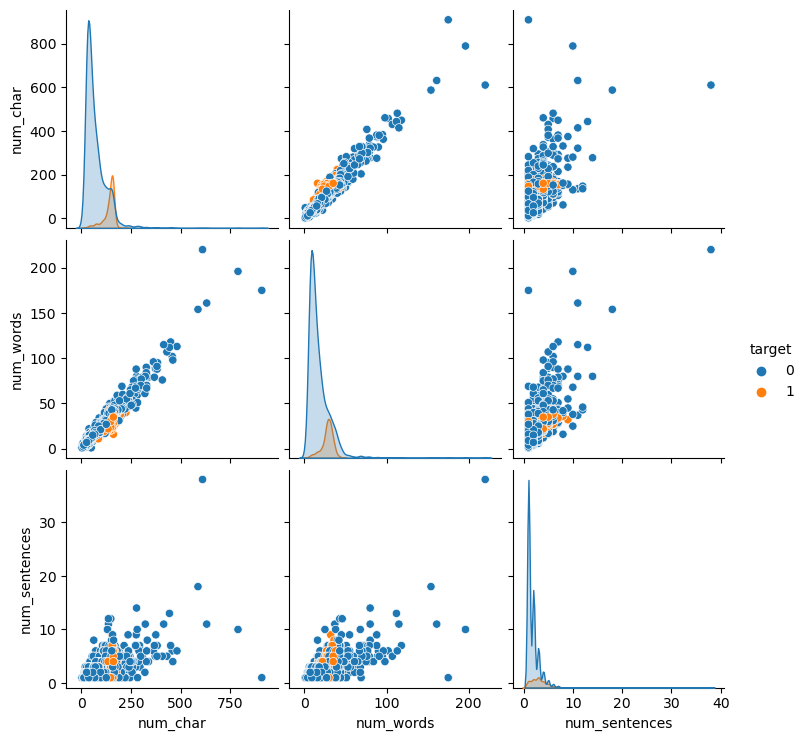

In [34]:
sns.pairplot(data, hue='target')

#### Heatmap Analysis:

<Axes: >

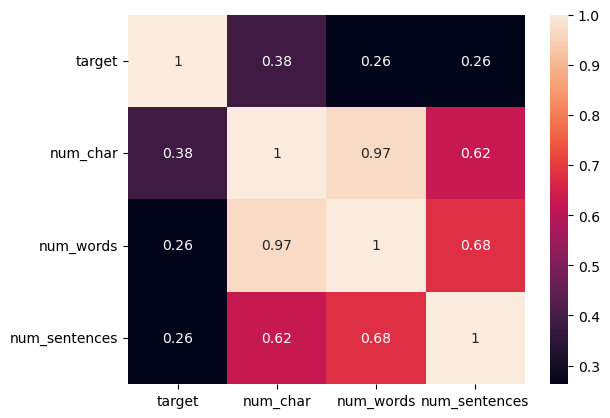

In [35]:
sns.heatmap(data.corr(numeric_only=True),annot=True)

#### Feature Engineering:

In [36]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.porter import PorterStemmer
import string

In [37]:
def transform_text(text):
    
    #Converting all text to lower case for uniformity
    text = text.lower()
    
    #Splitting text into individual words or tokens
    text = nltk.word_tokenize(text)
    ps = PorterStemmer() 
    
    #To removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
       
    # To removing stop words and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    
    # Stemming to reducing words to their root form to standardize them
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [38]:
data['text'][410]

'Come by our room at some point so we can iron out the plan for this weekend'

In [39]:
transform_text("Come by our room at some point so we can iron out the plan for this weekend")

'come room point iron plan weekend'

In [40]:
data['transformed_text'] = data['text'].apply(transform_text)

In [41]:
data.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#### Word Cloud Analysis:

In [42]:
from wordcloud import WordCloud
wc = WordCloud(width=800, height=400, min_font_size=5, background_color='white')

In [43]:
spam_wc = wc.generate(data[data['target']==1]['transformed_text'].str.cat(sep=" "))

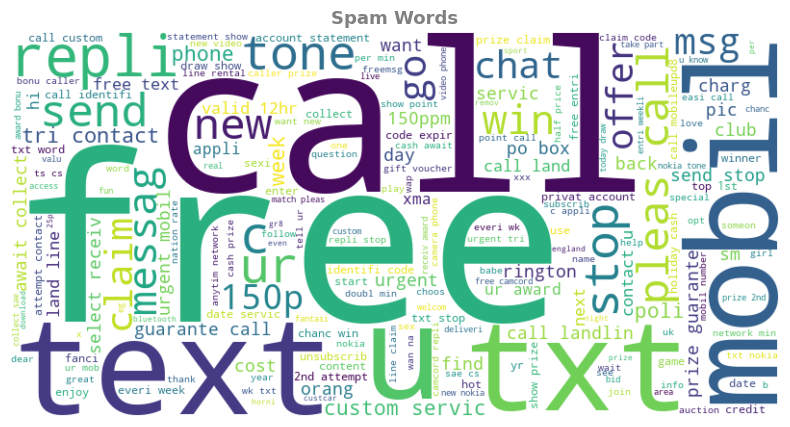

In [44]:
#For spam messages
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear', cmap='viridis')
plt.title(f'Spam Words', fontsize=13, fontweight='bold', color='Gray')
plt.axis('off')
plt.show()

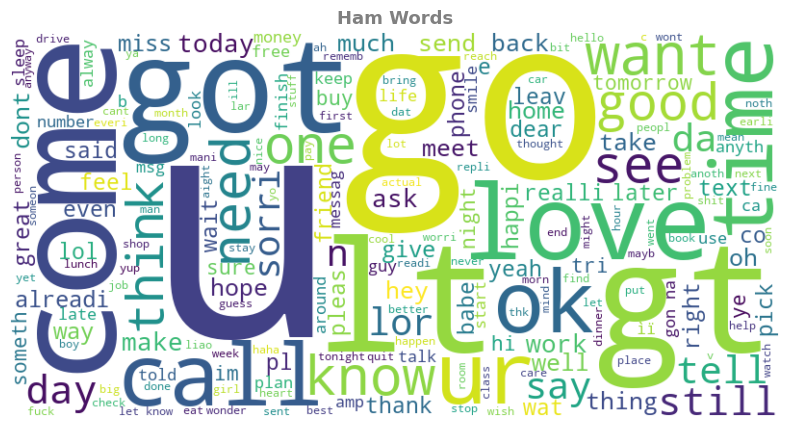

In [45]:
#For ham messages
spam_wc = wc.generate(data[data['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear', cmap='viridis')
plt.title(f'Ham Words', fontsize=13, fontweight='bold', color='Gray')
plt.axis('off')
plt.show()

#### Top word Frequency analysis:

In [46]:
spam_corpus = []
for msg in data[data['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

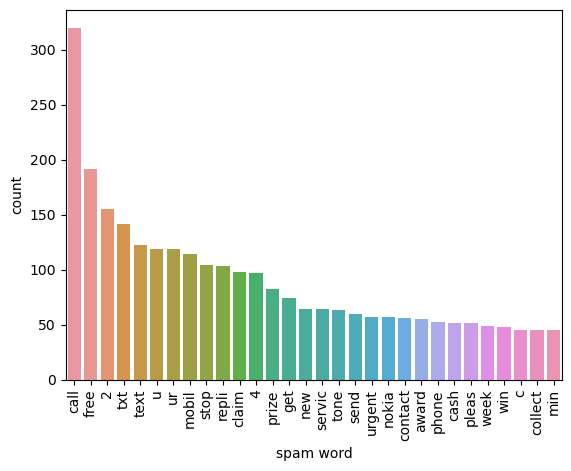

In [47]:
from collections import Counter

most_common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['spam word', 'count'])
sns.barplot(x='spam word', y='count', data=most_common_words)
plt.xticks(rotation='vertical')
plt.show()

In [48]:
ham_corpus = []
for msg in data[data['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

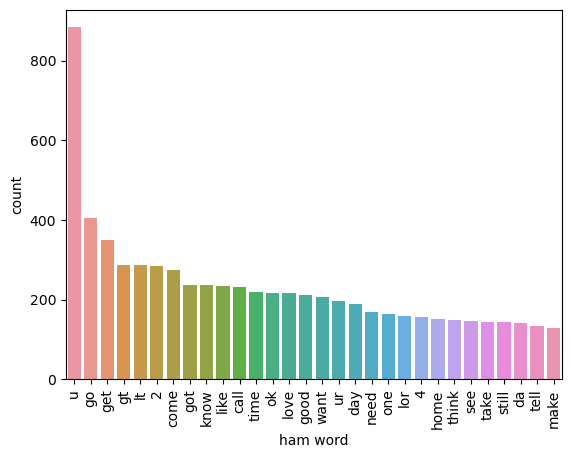

In [49]:
most_common_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['ham word', 'count'])
sns.barplot(x='ham word', y='count', data=most_common_words)
plt.xticks(rotation='vertical')
plt.show()

#### Text Vectorization:

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [51]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [52]:
X.shape

(5169, 3000)

In [53]:
Y=data['target'].values

#### Split the dataset into training and testing sets:

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2,random_state=2)

In [56]:
x_train.shape, y_train.shape

((4135, 3000), (4135,))

In [57]:
x_test.shape, y_test.shape

((1034, 3000), (1034,))

### <div style="color: gray;">Step 3: Classification Model Training and Evaluation-</div> 

#### Implement Naive Bayes Model for checking:

In [58]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,RocCurveDisplay
from termcolor import colored

In [59]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [60]:
gnb.fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred_gnb))
print(precision_score(y_test, y_pred_gnb))

0.8694390715667312
0.5068493150684932


In [61]:
mnb.fit(x_train,y_train)
y_pred_mnb = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred_mnb))
print(precision_score(y_test, y_pred_mnb))

0.9709864603481625
1.0


In [62]:
bnb.fit(x_train,y_train)
y_pred_bnb = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))

0.9835589941972921
0.991869918699187


**Observation:**
- `GaussianNB:`
  - **Accuracy:** 0.869
  - **Precision:** 0.506
  - GaussianNB performs moderately well on accuracy, but the precision score is relatively low. 
  - This implies that while the model is correctly classifying a large proportion of instances, it struggles with precision, meaning it's making many false positive predictions (classifying negative samples as positive).

- `MultinomialNB:`
  - **Accuracy:** 0.970
  - **Precision:** 1.0
  - This model shows a high accuracy and a perfect precision score. 
  - A precision score of 1.0 means that there are no false positives, i.e., every positive prediction made by the model is correct. However, it doesn't tell us about false negatives.
  - You may want to check recall to get a complete picture of how well it's performing.

- `BernoulliNB:`
  - **Accuracy:** 0.983
  - **Precision:** 0.991
  - BernoulliNB shows the best overall performance here, with a high accuracy and precision score close to 1.0. 
  - This means that the model is very good at correctly predicting positive instances with minimal false positives.
  - However, similar to MultinomialNB, looking into recall would help understand the balance between precision and recall.
    

#### All Classification Model Training and Evaluation:

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [64]:
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [65]:
clfs = {
    'SVC' : svc,
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [66]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
    try:
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        return accuracy, precision
    except Exception as e:
        print(f"Error with classifier {clf.__class__.__name__}: {str(e)}")
        return None, None

In [67]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

#### Evaluate Performence:

In [68]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [69]:
performance_data = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [70]:
performance_data

,Algorithm,Accuracy,Precision
1,NB,0.970986,1.000000
4,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
7,ETC,0.974855,0.974576
3,LR,0.958414,0.970297
5,AdaBoost,0.960348,0.929204
9,xgb,0.967118,0.926230
8,GBDT,0.946809,0.919192
6,BgC,0.958414,0.868217
2,DT,0.927466,0.811881


#### Voting Classifier:

In [71]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [72]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')

In [73]:
voting.fit(x_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [74]:
y_pred = voting.predict(x_test)

In [75]:
accuracy = accuracy_score(y_test, y_pred)

In [76]:
accuracy

0.9816247582205029

In [77]:
precision = precision_score(y_test, y_pred)

In [78]:
precision

0.9917355371900827

In [79]:
new_row = pd.DataFrame ({'Algorithm': ['Voting Classifier'], 'Accuracy': [0.981624], 'Precision': [0.991735]})
performance_data = pd.concat([performance_data, new_row], ignore_index=True)

performance_data

,Algorithm,Accuracy,Precision
0,NB,0.970986,1.000000
1,RF,0.975822,0.982906
2,SVC,0.975822,0.974790
3,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
5,AdaBoost,0.960348,0.929204
6,xgb,0.967118,0.926230
7,GBDT,0.946809,0.919192
8,BgC,0.958414,0.868217
9,DT,0.927466,0.811881


#### Observation Top 4 Classifier:

**1. Naive Bayes**
   - Accuracy: 0.970986
   - Precision: 1.000000

**2. RandomForestClassifier**
- Accuracy: 0.975822
- Precision: 0.982906

**3. Support Vector Classifier (SVC)**

- Accuracy: 0.975822
- Precision: 0.974790

**4. ExtraTreesClassifier**

- Accuracy: 0.974855
- Precision: 0.974576

**Interpretation:**
- Naive Bayes has the highest precision (1.000000), meaning it correctly identifies all positive cases without any false positives. However, its accuracy is slightly lower than some other models.

- RandomForestClassifier and SVC have the same accuracy (0.975822), but the RandomForestClassifier has slightly higher precision, making it more reliable in minimizing false positives compared to SVC.

- ExtraTreesClassifier has accuracy and precision very close to SVC, indicating it performs similarly, but slightly less accurately overall compared to the RandomForestClassifier.

**Considerations:**
- If your focus is on maximizing precision (e.g., in scenarios where false positives are costly), Naive Bayes would be the preferred model.
- If accuracy is your main concern, RandomForestClassifier and SVC perform similarly, with RandomForestClassifier having a slight edge in precision.
- ExtraTreesClassifier is also a good option, providing a balance close to SVC.

Each model has its strengths, so the choice depends on your specific use case and the importance of accuracy versus precision.

### <div style="color: gray;">Step 4: Hyperparameter Tuning-</div>

- I use RandomizedSearchCV for hyperparameter optimization. It basically works with various parameters internally and finds out the best parameters.
- I apply Hyperparameter tuning technique in our Top 4 Classifier Model because these four model gives present higher accuracy.

#### Initialized Hyperparameters:

In [80]:
#I use RandomizedSearchCV for hyperparameter optimization

from scipy.stats import randint, uniform, loguniform

#Define hyperparameters for Naive Bayes
nb_params = {
    'alpha': np.logspace(-3, 1, 50),  # explore alpha between 0.001 and 10
    'fit_prior': [True, False]  # explore both options for fit_prior
}

#Define hyperparameters for Random Forest
rf_params = {
    'n_estimators': np.arange(10, 200, 10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': np.arange(5, 50, 5),
    'min_samples_split': np.arange(2, 10, 2),
    'min_samples_leaf': np.arange(1, 10, 2),
    'bootstrap': [True, False]
}

#Define hyperparameters for Support Vector Machine (SVM)
svm_params = {
    'C': uniform(loc=0.1, scale=10),         
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  
    'degree': np.arange(2, 5),               
    'gamma': ['scale', 'auto', uniform(loc=0.01, scale=0.1)], 
    'coef0': uniform(0, 10),        
    'class_weight': [None, 'balanced']      
}

#Define hyperparameters for ExtraTreesClassifier
etc_params = {
    'n_estimators': np.arange(50, 500, 50),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': np.arange(2, 10, 1),
    'min_samples_leaf': np.arange(1, 10, 1),
    'bootstrap': [True, False]
}

#### Naive Bayes Model for DRandomizedSearchCV Hyperparameter:

In [81]:
#import hyperparameter
from sklearn.model_selection import RandomizedSearchCV

In [82]:
# Define RandomizedSearchCV for Naive Bayes
random_search_nv = RandomizedSearchCV(
    estimator=mnb, 
    param_distributions=nb_params, 
    n_iter=100,  # number of parameter settings that are sampled
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # or use any other scoring metric like 'precision', 'recall', etc.
    random_state=42,
    n_jobs=-1  # use all available cores
)

In [83]:
random_search_nv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=MultinomialNB(), n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': array([1.00000000e-03, 1.20679264e-03, 1.45634848e-03, 1.75751062e-03,
       2.12095089e-03, 2.55954792e-03, 3.08884360e-03, 3.72759372e-03,
       4.49843267e-03, 5.42867544e-03, 6.55128557e-03, 7.90604321e-03,
       9.54095476e-03, 1.15139540e-02, 1.38949549e-02, 1.67683294e-02,
       2.0...
       1.93069773e-01, 2.32995181e-01, 2.81176870e-01, 3.39322177e-01,
       4.09491506e-01, 4.94171336e-01, 5.96362332e-01, 7.19685673e-01,
       8.68511374e-01, 1.04811313e+00, 1.26485522e+00, 1.52641797e+00,
       1.84206997e+00, 2.22299648e+00, 2.68269580e+00, 3.23745754e+00,
       3.90693994e+00, 4.71486636e+00, 5.68986603e+00, 6.86648845e+00,
       8.28642773e+00, 1.00000000e+01]),
                                        'fit_prior': [True, False]},
                   random_state=42, scoring='accuracy')

In [84]:
random_search_nv.best_params_

{'fit_prior': True, 'alpha': 0.13257113655901082}

#### Evalution Naive Bayes Model for DRandomizedSearchCV Hyperparameter:

In [85]:
y_pred = random_search_nv.predict(x_test)

train_accuracy_NB_RSH = random_search_nv.score(x_train,y_train)
test_accuracy_NB_RSH = random_search_nv.score(x_test, y_test)
accuracy_score_NB_RSH = accuracy_score(y_test, y_pred)
precision_score_NB_RSH = precision_score(y_test, y_pred)
recall_score_NB_RSH = recall_score(y_test, y_pred)
f1_score_NB_RSH = f1_score(y_test, y_pred)
cm_NB_RSH = confusion_matrix(y_test, y_pred)

print(colored('Naive Bayes Model with DRandomizedSearchCV Hyperparameter Evaluation:\n',color = 'blue', attrs = ['bold','dark']))
print(colored(f'train_accuracy : {round(train_accuracy_NB_RSH, 6)}',color='light_magenta'))
print(colored(f'test_accuracy : {round(test_accuracy_NB_RSH, 6)}',color='light_magenta'))
print(colored(f'accuracy_score : {round(accuracy_score_NB_RSH, 6)}',color='light_magenta'))
print(colored(f'precision_score : {round(precision_score_NB_RSH, 6)}',color='light_magenta'))
print(colored(f'recall_score : {round(recall_score_NB_RSH, 6)}',color='light_magenta'))
print(colored(f'f1_score : {round(f1_score_NB_RSH, 6)}',color='light_magenta'))
print(colored(f'\nconfusion_matrix :\n {cm_NB_RSH}',color='light_yellow'))

Naive Bayes Model with DRandomizedSearchCV Hyperparameter Evaluation:

train_accuracy : 0.99081
test_accuracy : 0.981625
accuracy_score : 0.981625
precision_score : 0.976
recall_score : 0.884058
f1_score : 0.927757

confusion_matrix :
 [[893   3]
 [ 16 122]]


#### RocCurve visualization for Naive Bayes Classifier Model with DRandomizedSearchCV Hyperparameter:

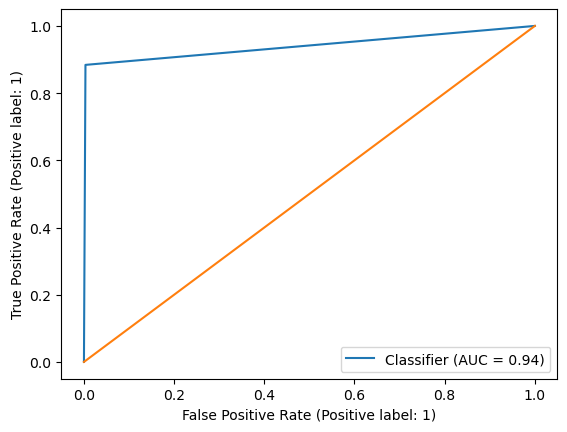

In [86]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.plot([0,1],[0,1])
plt.show()

#### Random Forest Model for DRandomizedSearchCV Hyperparameter:

In [87]:
rf = RandomForestClassifier()

rf_random_search = RandomizedSearchCV(
    rf, param_distributions=rf_params, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1
)

In [88]:
rf_random_search.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=42, verbose=2)

In [89]:
rf_random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 45,
 'bootstrap': False}

#### Evaluate Random Forest Classifier Model for DRandomizedSearchCV Hyperparameter:

In [90]:
y_pred= rf_random_search.predict(x_test)

train_accuracy_rf_RSH = rf_random_search.score(x_train,y_train)
test_accuracy_rf_RSH= rf_random_search.score(x_test, y_test)
accuracy_score_rf_RSH = accuracy_score(y_test, y_pred)
precision_score_rf_RSH = precision_score(y_test, y_pred)
recall_score_rf_RSH = recall_score(y_test, y_pred)
f1_score_rf_RSH= f1_score(y_test, y_pred)
cm_rf_RSH = confusion_matrix(y_test, y_pred)

print(colored('Random Forest Classifier with DRandomizedSearchCV Hyperparameter Model Evaluation:\n',color = 'blue', attrs = ['bold','dark']))
print(colored(f'train_accuracy : {round(train_accuracy_rf_RSH,6)}',color='light_magenta'))
print(colored(f'test_accuracy : {round(test_accuracy_rf_RSH,6)}',color='light_magenta'))
print(colored(f'accuracy_score : {round(accuracy_score_rf_RSH,6)}',color='light_magenta'))
print(colored(f'precision_score : {round(precision_score_rf_RSH,6)}',color='light_magenta'))
print(colored(f'recall_score : {round(recall_score_rf_RSH,6)}',color='light_magenta'))
print(colored(f'f1_score : {round(f1_score_rf_RSH,6)}',color='light_magenta'))
print(colored(f'\nconfusion_matrix :\n {cm_rf_RSH}',color='light_yellow'))

Random Forest Classifier with DRandomizedSearchCV Hyperparameter Model Evaluation:

train_accuracy : 0.992019
test_accuracy : 0.975822
accuracy_score : 0.975822
precision_score : 0.982906
recall_score : 0.833333
f1_score : 0.901961

confusion_matrix :
 [[894   2]
 [ 23 115]]


#### RocCurve visualization for Random Forest Classifier Model with DRandomizedSearchCV Hyperparameter:

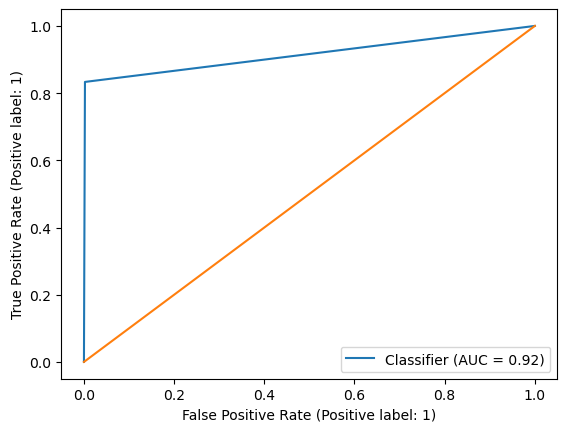

In [91]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.plot([0,1],[0,1])
plt.show()

#### Support Vector Machine (SVM) classifier Model for DRandomizedSearchCV Hyperparameter:

In [92]:
from sklearn.svm import SVC
svc = SVC()

svm_random_search = RandomizedSearchCV(
    svc, param_distributions=svm_params, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1
)

In [93]:
svm_random_search.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F110C28C10>,
                                        'class_weight': [None, 'balanced'],
                                        'coef0': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F110C2B490>,
                                        'degree': array([2, 3, 4]),
                                        'gamma': ['scale', 'auto',
                                                  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F111037690>],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42, verbose=2)

In [94]:
svm_random_search.best_params_

{'C': 5.287906217433661,
 'class_weight': None,
 'coef0': 4.038361710580408,
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly'}

#### Evaluate Support Vector Machine (SVM) Classifier Model for DRandomizedSearchCV Hyperparameter:

In [95]:
y_pred= svm_random_search.predict(x_test)

train_accuracy_SVC_RSH = svm_random_search.score(x_train,y_train)
test_accuracy_SVC_RSH = svm_random_search.score(x_test, y_test)
accuracy_score_SVC_RSH = accuracy_score(y_test, y_pred)
precision_score_SVC_RSH = precision_score(y_test, y_pred)
recall_score_SVC_RSH = recall_score(y_test, y_pred)
f1_score_SVC_RSH = f1_score(y_test, y_pred)
cm_SVC_RSH = confusion_matrix(y_test, y_pred)

print(colored('Support Vector Machine (SVM) with DRandomizedSearchCV Hyperparameter Model Evaluation:\n',color = 'blue', attrs = ['bold','dark']))
print(colored(f'train_accuracy : {round(train_accuracy_SVC_RSH,6)}',color='light_magenta'))
print(colored(f'test_accuracy : {round(test_accuracy_SVC_RSH,6)}',color='light_magenta'))
print(colored(f'accuracy_score : {round(accuracy_score_SVC_RSH,6)}',color='light_magenta'))
print(colored(f'precision_score : {round(precision_score_SVC_RSH,6)}',color='light_magenta'))
print(colored(f'recall_score : {round(recall_score_SVC_RSH,6)}',color='light_magenta'))
print(colored(f'f1_score : {round(f1_score_SVC_RSH,6)}',color='light_magenta'))
print(colored(f'\nconfusion_matrix :\n {cm_SVC_RSH}',color='light_yellow'))

Support Vector Machine (SVM) with DRandomizedSearchCV Hyperparameter Model Evaluation:

train_accuracy : 0.999758
test_accuracy : 0.978723
accuracy_score : 0.978723
precision_score : 0.953125
recall_score : 0.884058
f1_score : 0.917293

confusion_matrix :
 [[890   6]
 [ 16 122]]


#### RocCurve visualization for Support Vector Machine (SVM) Classifier Model with DRandomizedSearchCV Hyperparameter:

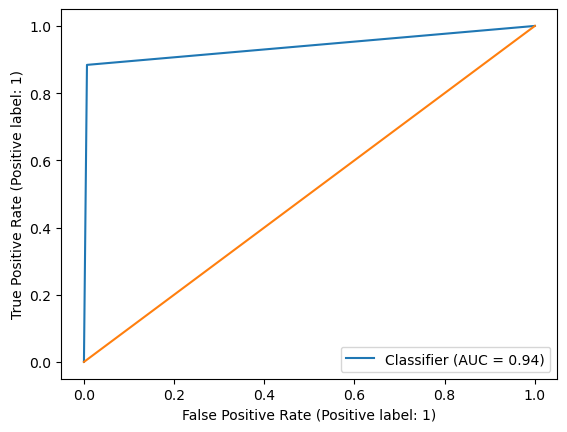

In [96]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.plot([0,1],[0,1])
plt.show()

#### Extra Trees Classifier Model for DRandomizedSearchCV Hyperparameter:

In [97]:
model = ExtraTreesClassifier(random_state=42)

In [98]:
# Set up the RandomizedSearchCV for Extra Trees Classifier
random_search_etc = RandomizedSearchCV(
    estimator=model,
    param_distributions=etc_params,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

In [99]:
random_search_etc.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=42, verbose=2)

In [100]:
random_search_etc.best_params_

{'n_estimators': 150,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None,
 'bootstrap': False}

#### Evaluate Extra Trees Classifier Model for DRandomizedSearchCV Hyperparameter:

In [101]:
y_pred = random_search_etc.predict(x_test)

train_accuracy_ETC_RSH = random_search_etc.score(x_train,y_train)
test_accuracy_ETC_RSH = random_search_etc.score(x_test, y_test)
accuracy_score_ETC_RSH = accuracy_score(y_test, y_pred)
precision_score_ETC_RSH = precision_score(y_test, y_pred)
recall_score_ETC_RSH = recall_score(y_test, y_pred)
f1_score_ETC_RSH = f1_score(y_test, y_pred)
cm_ETC_RSH = confusion_matrix(y_test, y_pred)

print(colored('Naive Bayes Model with DRandomizedSearchCV Hyperparameter Evaluation:\n',color = 'blue', attrs = ['bold','dark']))
print(colored(f'train_accuracy : {round(train_accuracy_ETC_RSH, 6)}',color='light_magenta'))
print(colored(f'test_accuracy : {round(test_accuracy_ETC_RSH, 6)}',color='light_magenta'))
print(colored(f'accuracy_score : {round(accuracy_score_ETC_RSH, 6)}',color='light_magenta'))
print(colored(f'precision_score : {round(precision_score_ETC_RSH, 6)}',color='light_magenta'))
print(colored(f'recall_score : {round(recall_score_ETC_RSH, 6)}',color='light_magenta'))
print(colored(f'f1_score : {round(f1_score_ETC_RSH, 6)}',color='light_magenta'))
print(colored(f'\nconfusion_matrix :\n {cm_ETC_RSH}',color='light_yellow'))

Naive Bayes Model with DRandomizedSearchCV Hyperparameter Evaluation:

train_accuracy : 0.999758
test_accuracy : 0.976789
accuracy_score : 0.976789
precision_score : 0.991379
recall_score : 0.833333
f1_score : 0.905512

confusion_matrix :
 [[895   1]
 [ 23 115]]


#### RocCurve visualization for Extra Trees Classifier Model with DRandomizedSearchCV Hyperparameter:

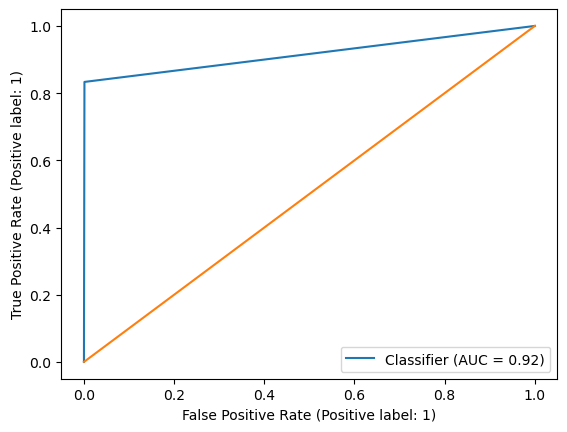

In [102]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.plot([0,1],[0,1])
plt.show()

#### Observations:

- **1. Naive Bayes Model:**
  - **Accuracy Score:** 0.981625
  - **Precision Score:** 0.976

The Naive Bayes model has the highest accuracy but slightly lower precision compared to the other models. This suggests that while the model is generally good at classifying correctly, it may have a slightly higher rate of false positives.

- **2. Random Forest Classifier:**

  - **Accuracy Score:** 0.975822
  - **Precision Score:** 0.982906
The Random Forest model has high precision, indicating that it is better at reducing false positives, although its accuracy is slightly lower than the Naive Bayes model.

- **3. Support Vector Machine (SVM):**

  - **Accuracy Score:** 0.978723
  - **Precision Score:** 0.953125
The SVM model has a balanced performance, with slightly lower precision compared to others. It might be prone to false positives more than the other models but maintains good accuracy.

- **4. Extra Trees Classifier:**

  - **Accuracy Score:** 0.976789
  - **Precision Score:** 0.991379
The Extra Trees Classifier shows the highest precision score, which means it is excellent at reducing false positives. However, the accuracy is marginally lower than the Naive Bayes model.

**Summary:**
The Naive Bayes model has the highest accuracy, but Extra Trees Classifier provides the best precision, meaning it makes the fewest incorrect positive predictions.
If you prioritize precision (minimizing false positives), the Extra Trees Classifier might be the best choice.
For a balance between accuracy and precision, the Random Forest Classifier is also a strong candidate.
The SVM model, while slightly lower in both metrics, might still be preferable depending on specific domain requirements.

### <div style="color: gray;">Step 5: Comparative Analysis-</div>

#### Compare the performance of different models:

In [103]:
d = {
    'model' : ['Naive Bayes with Random Search Hyperparameter',
               'Random Forest Classifier with Random Search Hyperparameter',
               'Support Vector Machine (SVM) with Random Search Hyperparameter',
               'Extra Trees Classifier with Random Search Hyperparameter'],  
    
    'train accuracy': [train_accuracy_NB_RSH,train_accuracy_rf_RSH,train_accuracy_SVC_RSH,train_accuracy_ETC_RSH],
    'test accuracy': [test_accuracy_NB_RSH,test_accuracy_rf_RSH,test_accuracy_SVC_RSH,test_accuracy_ETC_RSH],
    'accuracy score': [accuracy_score_NB_RSH,accuracy_score_rf_RSH,accuracy_score_SVC_RSH,accuracy_score_ETC_RSH],
    'precision score': [precision_score_NB_RSH,precision_score_rf_RSH,precision_score_SVC_RSH,precision_score_ETC_RSH],
    'recall score': [recall_score_NB_RSH,recall_score_rf_RSH,recall_score_SVC_RSH,recall_score_ETC_RSH],
    'f1_score': [f1_score_NB_RSH,f1_score_rf_RSH,f1_score_SVC_RSH,f1_score_ETC_RSH],  
}


d = pd.DataFrame(d)

d['train accuracy'] = d['train accuracy'].round(6)
d['test accuracy'] = d['test accuracy'].round(6)
d['accuracy score'] = d['accuracy score'].round(6)
d['precision score'] = d['precision score'].round(6)
d['recall score'] = d['recall score'].round(6)
d['f1_score'] = d['f1_score'].round(6)

d

,model,train accuracy,test accuracy,accuracy score,precision score,recall score,f1_score
0,Naive Bayes with Random Search Hyperparameter,0.990810,0.981625,0.981625,0.976000,0.884058,0.927757
1,Random Forest Classifier with Random Search Hy...,0.992019,0.975822,0.975822,0.982906,0.833333,0.901961
2,Support Vector Machine (SVM) with Random Searc...,0.999758,0.978723,0.978723,0.953125,0.884058,0.917293
3,Extra Trees Classifier with Random Search Hype...,0.999758,0.976789,0.976789,0.991379,0.833333,0.905512


#### Visualize performance with histogram:

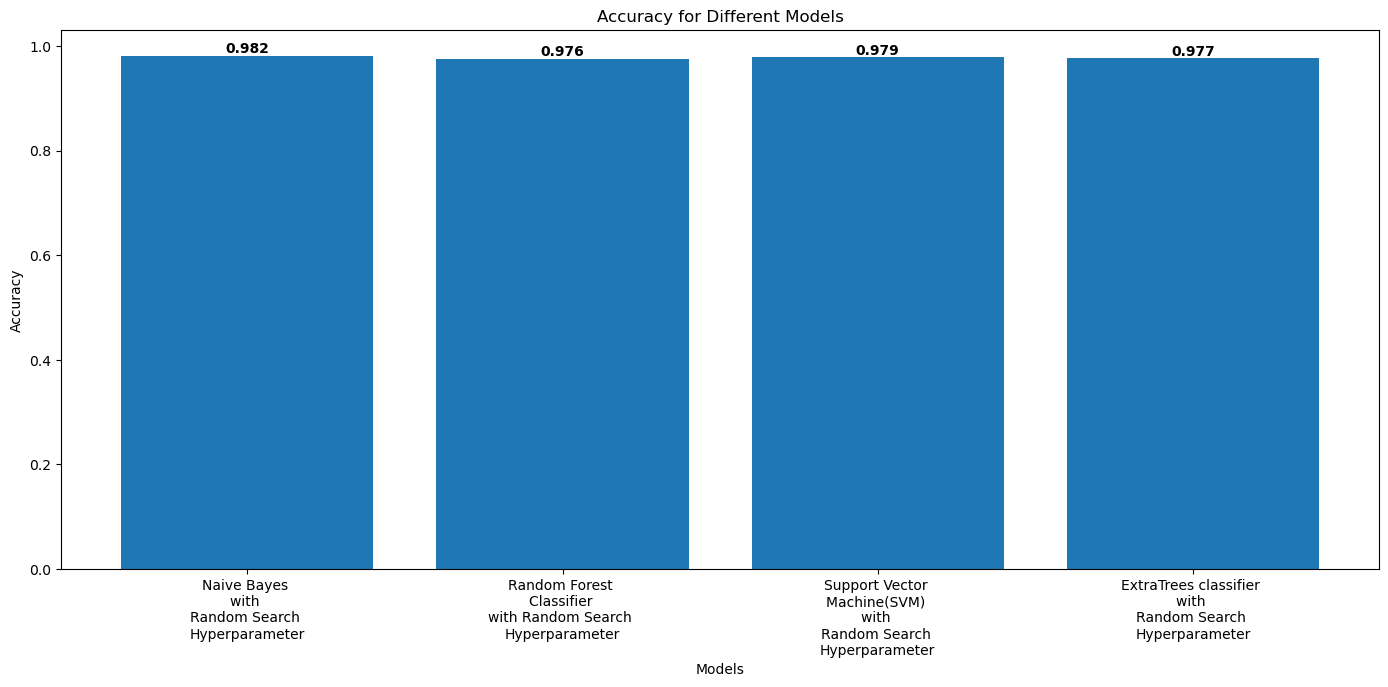

In [104]:
#Accuracy score plot
def plot_histogram(metric_values, model_names, metric_name):
    fig, ax = plt.subplots(figsize=(17, 7))
    bars = plt.bar(model_names, metric_values)
    plt.xlabel('Models')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} for Different Models')

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', color='black', fontweight='bold')
    plt.show()

accuracy_values = [accuracy_score_NB_RSH,accuracy_score_rf_RSH,accuracy_score_SVC_RSH,accuracy_score_ETC_RSH]
model_names = ['Naive Bayes \nwith \nRandom Search \nHyperparameter',
               'Random Forest \nClassifier \nwith Random Search \nHyperparameter',
               'Support Vector \nMachine(SVM) \nwith \nRandom Search \nHyperparameter',
               'ExtraTrees classifier \nwith \nRandom Search \nHyperparameter' ]
plot_histogram(accuracy_values, model_names, 'Accuracy')

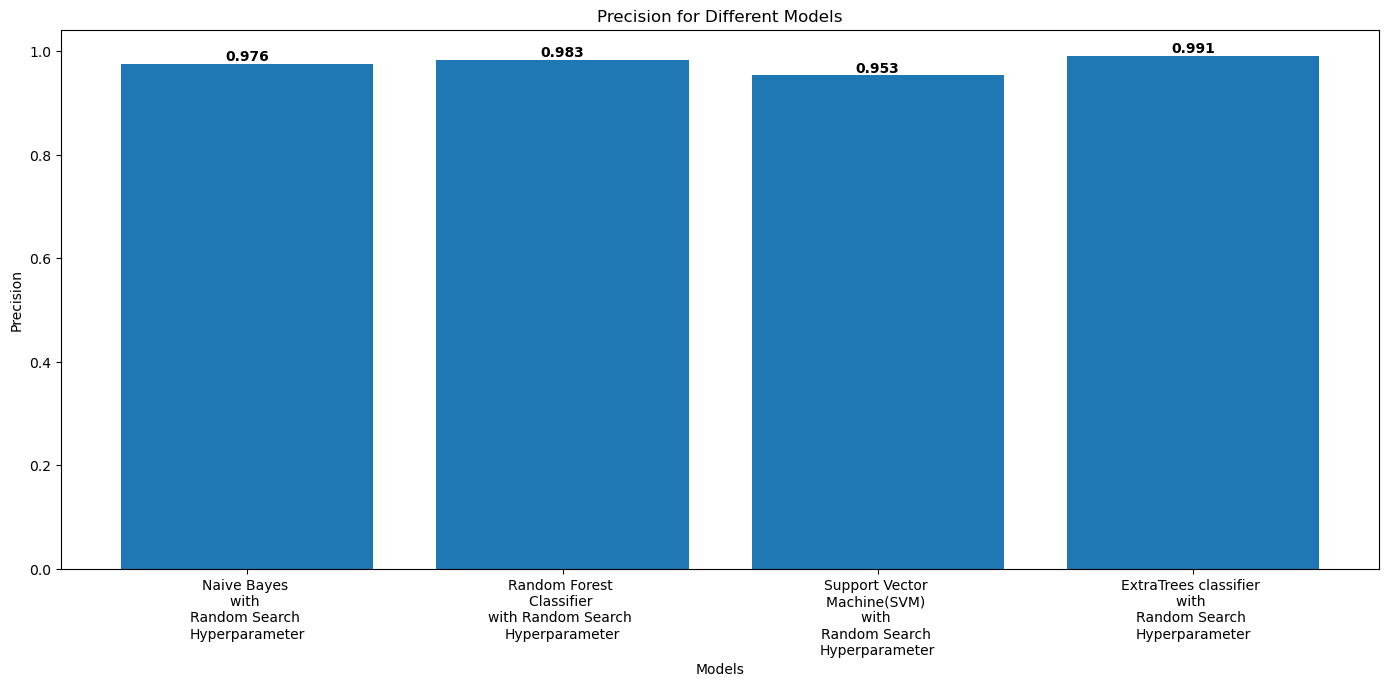

In [105]:
#Precision score plot
def plot_histogram(metric_values, model_names, metric_name):
    fig, ax = plt.subplots(figsize=(17, 7))
    bars = plt.bar(model_names, metric_values)
    plt.xlabel('Models')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} for Different Models')

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', color='black', fontweight='bold')
    plt.show()

precision_values = [precision_score_NB_RSH,precision_score_rf_RSH,precision_score_SVC_RSH,precision_score_ETC_RSH]
model_names = ['Naive Bayes \nwith \nRandom Search \nHyperparameter',
               'Random Forest \nClassifier \nwith Random Search \nHyperparameter',
               'Support Vector \nMachine(SVM) \nwith \nRandom Search \nHyperparameter',
               'ExtraTrees classifier \nwith \nRandom Search \nHyperparameter' ]
plot_histogram(precision_values, model_names, 'Precision')

#### Final Analysis:

Based on the metrics provided, here’s an analysis to determine the best classifier:

**Key Considerations:**
- **Accuracy:** Indicates the proportion of correctly predicted instances.
- **Precision:** Indicates the proportion of true positive results among all positive predictions.

**Model Evaluation:**

- **Naive Bayes:**
  - **Accuracy:** 0.970986 (first run), 0.981625 (with hyperameter tuning second run)
  - **Precision:** 1.000000  (first run), 0.976 (with hyperameter tuning second run)

- **Random Forest Classifier:**
  - **Accuracy:** 0.975822 (consistent in both runs)
  - **Precision:** 0.982906 (consistent in both runs)

- **Support Vector Machine (SVM):**

  - **Accuracy:** 0.975822 (first run), 0.978723 (with hyperameter tuning second run)
  - **Precision:** 0.974790 (first run), 0.953125 (with hyperameter tuning second run)

- **Extra Trees Classifier:**

  - **Accuracy:** 0.974855 (first run), 0.976789 (with hyperameter tuning second run)
  - **Precision:** 0.974576 (first run), 0.991379 (with hyperameter tuning second run)

- **Voting Classifier:**

  - **Accuracy:** 0.981624
  - **Precision:** 0.991735

**Conclusion:**

- **Best Model Based on Precision:** The Naive Bayes model achieved a perfect precision score (1.000000) in one of the runs, meaning it had no false positives.

- **Best Model Based on Accuracy:** The Voting Classifier achieved the highest accuracy (0.981624) with a high precision (0.991735).

Given the balance between accuracy and precision, the Voting Classifier seems to be the best overall model, offering both high accuracy and precision.

If perfect precision is more critical (e.g., in applications where false positives are very costly), then Naive Bayes with its perfect precision in one of the evaluations would be the top choice. However, for a balanced approach, the Voting Classifier is recommended.